In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Load the data from the CSV file
data = pd.read_csv('stock_data.csv')

# Preprocess the data
data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' column to datetime format
data.sort_values('Date', inplace=True)  # Sort the data by date

In [ ]:
# Extract the 'Close' price as the target variable
target_variable = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(target_variable)

# Split the data into training and testing sets
train_data = scaled_data[:int(0.8 * len(scaled_data))]
test_data = scaled_data[int(0.8 * len(scaled_data)):]

# Define the number of previous time steps to use for prediction
n_steps = 60

In [ ]:
# Prepare the training dataset
X_train, y_train = [], []
for i in range(n_steps, len(train_data)):
    X_train.append(train_data[i - n_steps:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data for LSTM input [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Build the Stacked LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(n_steps, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Prepare the testing dataset
inputs = target_variable[len(target_variable) - len(test_data) - n_steps:]
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(n_steps, len(inputs)):
    X_test.append(inputs[i - n_steps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Epoch 1/50
49/49 [==============================] - 11s 11ms/step - loss: 0.0055
Epoch 2/50
49/49 [==============================] - 1s 11ms/step - loss: 8.9169e-04
Epoch 3/50
49/49 [==============================] - 1s 11ms/step - loss: 7.4814e-04
Epoch 4/50
49/49 [==============================] - 1s 11ms/step - loss: 7.0817e-04
Epoch 5/50
49/49 [==============================] - 1s 11ms/step - loss: 6.7866e-04
Epoch 6/50
49/49 [==============================] - 1s 13ms/step - loss: 6.1214e-04
Epoch 7/50
49/49 [==============================] - 1s 15ms/step - loss: 5.8889e-04
Epoch 8/50
49/49 [==============================] - 1s 15ms/step - loss: 5.2407e-04
Epoch 9/50
49/49 [==============================] - 1s 16ms/step - loss: 5.2448e-04
Epoch 10/50
49/49 [==============================] - 1s 19ms/step - loss: 4.8387e-04
Epoch 11/50
49/49 [==============================] - 1s 11ms/step - loss: 4.8862e-04
Epoch 12/50
49/49 [==============================] - 1s 11ms/step - loss: 5.0

In [ ]:
# Perform prediction on the testing dataset
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

13/13 [==============================] - 2s 7ms/step


In [ ]:
# Print the predicted stock prices
print(predicted_stock_price)

[[141.02087]
 [144.80328]
 [143.06577]
 [142.72018]
 [140.82869]
 [140.02193]
 [137.79185]
 [138.99147]
 [139.38303]
 [140.8062 ]
 [140.92647]
 [139.29323]
 [138.35611]
 [138.01302]
 [137.28043]
 [142.5058 ]
 [140.80937]
 [142.45197]
 [142.51335]
 [141.91682]
 [140.52586]
 [139.86133]
 [136.41096]
 [138.39905]
 [140.24089]
 [144.05838]
 [144.40182]
 [145.71019]
 [145.10326]
 [142.15851]
 [150.40266]
 [150.63939]
 [147.59613]
 [149.32579]
 [149.54141]
 [149.04219]
 [149.43326]
 [150.87106]
 [151.65503]
 [151.98291]
 [149.31927]
 [149.66232]
 [152.38239]
 [150.66724]
 [149.2395 ]
 [148.19942]
 [146.96558]
 [149.1892 ]
 [151.36435]
 [150.39525]
 [150.9007 ]
 [150.6194 ]
 [152.74922]
 [150.99765]
 [151.96835]
 [156.92946]
 [155.14288]
 [153.99785]
 [150.75243]
 [151.27045]
 [153.03847]
 [153.91916]
 [152.89392]
 [151.3894 ]
 [153.53535]
 [153.40811]
 [151.6194 ]
 [146.00899]
 [148.27284]
 [146.88695]
 [143.79129]
 [140.75308]
 [142.1603 ]
 [146.3272 ]
 [145.07945]
 [144.88153]
 [148.6709 ]

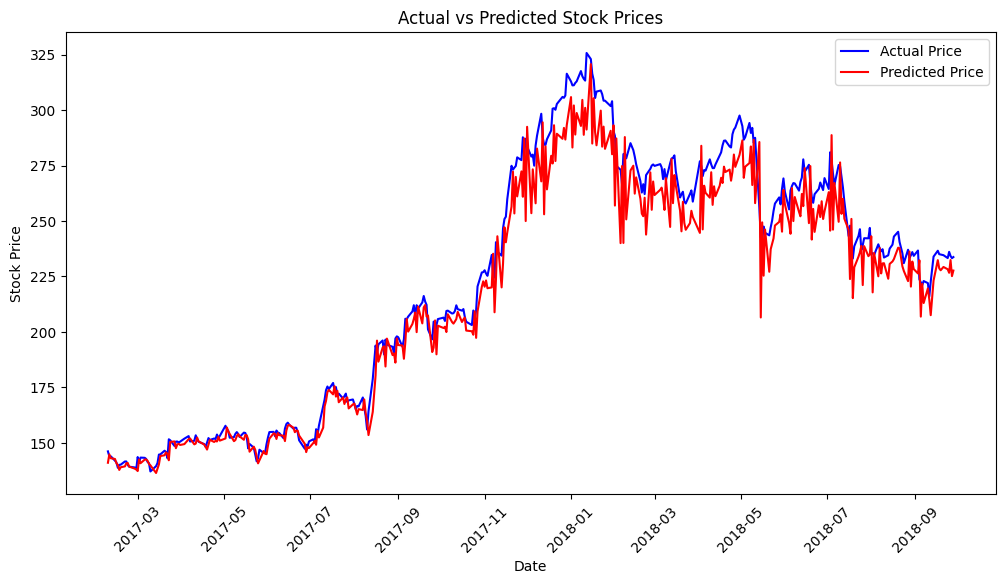

NameError: ignored

<Figure size 800x400 with 0 Axes>